<a href="https://colab.research.google.com/github/AbeMauriceVictorino/covid-19-Hawaii/blob/master/Covid_19_Hawaii_Abe_Victorino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Code for Individual Project - ICS360 - Abe Victorino

[link text](https://)**Covid-19 Analysis - April 30, 2020**

Source: The original code for the national data is from Noah Gift's book on Minimal Python. Github Source - https://github.com/debasisb/minimal-python/blob/master/Chapter7_data_science.ipynb


Hawaii Cases *Currently

In [19]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
Hawaii_df = df[df["state"] == "Hawaii"].drop(columns="fips").drop(columns="state")
Hawaii_df.tail(15)

,date,cases,deaths
2501,2020-04-17,547,9
2556,2020-04-18,568,9
2611,2020-04-19,574,10
2666,2020-04-20,578,10
2721,2020-04-21,580,12
2776,2020-04-22,586,12
2831,2020-04-23,590,12
2886,2020-04-24,595,13
2941,2020-04-25,597,14
2996,2020-04-26,599,14


In [20]:
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
fig = px.scatter(Hawaii_df, x="date", y="cases")
fig.show()

CASES BY COUNTY


Import County Level Data For Hawaii from County Dataset

In [22]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")
Counties_df = df[df["state"] == "Hawaii"].drop(columns="fips").drop(columns="state")
Counties_df.tail(15)

,date,county,cases,deaths
95940,2020-04-28,Honolulu,396,11
95941,2020-04-28,Kauai,21,0
95942,2020-04-28,Maui,115,5
98780,2020-04-29,Hawaii,70,0
98781,2020-04-29,Honolulu,399,11
98782,2020-04-29,Kauai,21,0
98783,2020-04-29,Maui,115,5
101628,2020-04-30,Hawaii,73,0
101629,2020-04-30,Honolulu,399,11
101630,2020-04-30,Kauai,21,0


In [23]:
Counties_df.columns

Index(['date', 'county', 'cases', 'deaths'], dtype='object')

In [24]:
Counties_df.shape

(225, 4)

In [25]:
Datedf = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
Datedf["date"] = pd.to_datetime(df["date"])
Datedf = df.set_index("date")
print(f"Columns: {df.columns}")
Datedf.index

Columns: Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')


Index(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-24',
       '2020-01-25', '2020-01-25', '2020-01-25', '2020-01-26', '2020-01-26',
       ...
       '2020-05-01', '2020-05-01', '2020-05-01', '2020-05-01', '2020-05-01',
       '2020-05-01', '2020-05-01', '2020-05-01', '2020-05-01', '2020-05-01'],
      dtype='object', name='date', length=106826)

In [26]:
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
fig = px.scatter(Counties_df, x="county", y="cases")
fig.show()

Create a data frame for Maui County and display data for past 15 days

MAUI COUNTY

In [27]:
Maui_County_df = Counties_df[df["county"]== "Maui"]
Maui_County_df.tail(15)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,date,county,cases,deaths
65223,2020-04-17,Maui,102,3
67973,2020-04-18,Maui,104,3
70735,2020-04-19,Maui,106,4
73505,2020-04-20,Maui,108,4
76282,2020-04-21,Maui,110,5
79065,2020-04-22,Maui,110,5
81861,2020-04-23,Maui,112,5
84662,2020-04-24,Maui,113,5
87473,2020-04-25,Maui,112,5
90291,2020-04-26,Maui,112,5


In [28]:
Maui_County_df.columns

Index(['date', 'county', 'cases', 'deaths'], dtype='object')

Visualization of Cases on Maui County over time

POSITIVE CASES *CURRENTLY

In [30]:
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
fig = px.scatter(Maui_County_df, x="date", y="cases")
fig.show()

DEATHS

In [31]:
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
fig = px.scatter(Maui_County_df, x="date", y="deaths")
fig.show()


LINEAR REGRESSION

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



<Figure size 1080x360 with 0 Axes>

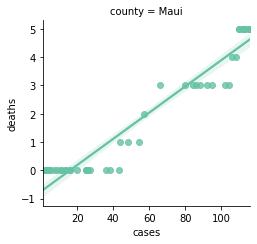

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="county",
                    col_wrap=5,
                    hue="county", 
                    palette="Set2",
                    data=Maui_County_df)
ax.fig.subplots_adjust(wspace=.2)

Create a data frame for Honolulu County and display data for the past 15 days

In [33]:

Honolulu_County_df = Counties_df[df["county"]== "Honolulu"]
Honolulu_County_df.tail(15)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,date,county,cases,deaths
65221,2020-04-17,Honolulu,380,6
67971,2020-04-18,Honolulu,382,6
70733,2020-04-19,Honolulu,385,6
73503,2020-04-20,Honolulu,385,6
76280,2020-04-21,Honolulu,385,7
79063,2020-04-22,Honolulu,388,7
81859,2020-04-23,Honolulu,389,7
84660,2020-04-24,Honolulu,392,8
87471,2020-04-25,Honolulu,395,9
90289,2020-04-26,Honolulu,396,9



Visualization of Cases on Honolulu County over time


POSITIVE CASES *Currently

In [34]:
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
fig = px.scatter(Honolulu_County_df, x="date", y="cases")
fig.show()

DEATHS

In [35]:
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
fig = px.scatter(Honolulu_County_df, x="date", y="deaths")
fig.show()


LINEAR REGRESSION

<Figure size 1080x360 with 0 Axes>

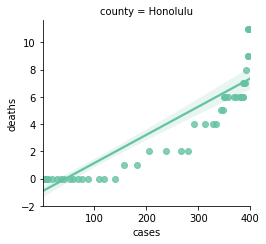

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="county",
                    col_wrap=5,
                    hue="county", 
                    palette="Set2",
                    data=Honolulu_County_df)
ax.fig.subplots_adjust(wspace=.2)

Analysis of Hawaii County

In [37]:

Hawaii_County_df = Counties_df[df["county"]== "Hawaii"]
Hawaii_County_df.tail(15)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,date,county,cases,deaths
65220,2020-04-17,Hawaii,44,0
67970,2020-04-18,Hawaii,61,0
70732,2020-04-19,Hawaii,62,0
73502,2020-04-20,Hawaii,64,0
76279,2020-04-21,Hawaii,64,0
79062,2020-04-22,Hawaii,67,0
81858,2020-04-23,Hawaii,68,0
84659,2020-04-24,Hawaii,69,0
87470,2020-04-25,Hawaii,69,0
90288,2020-04-26,Hawaii,70,0


Visualization of cases at Hawaii County over time

Positive Cases *Currently

In [38]:
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
fig = px.scatter(Hawaii_County_df, x="date", y="cases")
fig.show()

DEATHS

In [39]:
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
fig = px.scatter(Hawaii_County_df, x="date", y="deaths")
fig.show()



LINEAR REGRESSION

<Figure size 1080x360 with 0 Axes>

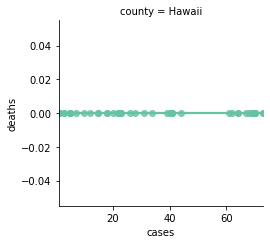

In [40]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="county",
                    col_wrap=5,
                    hue="county", 
                    palette="Set2",
                    data=Hawaii_County_df)
ax.fig.subplots_adjust(wspace=.2)


KAUAI COUNTY

In [41]:
Kauai_County_df = Counties_df[df["county"]== "Kauai"]
Kauai_County_df.head(35)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,date,county,cases,deaths
2035,2020-03-14,Kauai,2,0
2424,2020-03-15,Kauai,2,0
2865,2020-03-16,Kauai,2,0
3353,2020-03-17,Kauai,2,0
3915,2020-03-18,Kauai,2,0
4591,2020-03-19,Kauai,2,0
5391,2020-03-20,Kauai,3,0
6325,2020-03-21,Kauai,3,0
7373,2020-03-22,Kauai,3,0
8527,2020-03-23,Kauai,3,0


In [42]:
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
fig = px.scatter(Kauai_County_df, x="date", y="cases")
fig.show()